In [63]:
import pandas as pd
import pickle
import numpy as np
import sklearn
from datetime import datetime  
from datetime import timedelta
import geopy.distance
import matplotlib.pyplot as plt
import networkx as nx

In [64]:
with open('../pkl/COVID_sorted_W_tensors_ver2.pkl', 'rb') as f:
    travel_tensor_raw = pickle.load(f) 
    
with open('../pkl/COVID_label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f) 

In [65]:
country_cutline = 54 # 69, 70 give None homogeneity
travel_tensors = travel_tensor_raw[:,0:country_cutline,0:country_cutline]

In [66]:
attract = np.sum(travel_tensors, 1) # attractiveness
emit = np.sum(travel_tensors, 2) # emmisiveness
mean_adj = np.mean(travel_tensors,0)

In [67]:
avg_attract = np.mean(attract, 0)
avg_emit = np.mean(emit, 0)

In [68]:
pop = pd.read_csv("../COVIDdata/SeoulFloating.csv")
pop.date=pd.to_datetime(pop.date)

In [69]:
pop

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [8]:
sum_pop = pop.groupby(['city'])[['city','fp_num']].sum().reset_index()

In [9]:
time_len = len(pop['date'].unique())

In [10]:
avg_pop = sum_pop
avg_pop['fp_num'] = avg_pop['fp_num']/time_len

In [11]:
avg_pop

,city,fp_num
0,Dobong-gu,5.761227e+06
1,Dongdaemun-gu,6.960437e+06
2,Dongjag-gu,7.491807e+06
3,Eunpyeong-gu,8.058139e+06
4,Gangbuk-gu,5.721899e+06
5,Gangdong-gu,7.998103e+06
6,Gangnam-gu,1.403230e+07
7,Gangseo-gu,1.060369e+07
8,Geumcheon-gu,5.433533e+06
9,Guro-gu,8.500131e+06


In [12]:
ccode = pd.read_csv('countries_codes_and_coordinates.csv').replace('"','', regex=True).replace(' ','', regex=True)

In [13]:
ccode = pd.read_csv('../COVIDdata/Region.csv')

In [14]:
ccode[ccode['city']=='Gangdong-gu']['latitude']-ccode[ccode['city']=='Gangdong-gu']['longitude']

2   -89.593345
dtype: float64

In [15]:
label3 = list(label_dict.values())

In [16]:
# from geopy import distance
# gravity_df = np.zeros([country_cutline*country_cutline*(21-2),4])
# line = 0
# nodes_array = [0,2,3,7,8,9,10,11,13,14,15,16,18,19,20,22,25,26,28]
nodes_array = np.append(range(20),[22,25,26,28])

# floating_list = []
# for i in nodes_array:
#     floating_list.append(node_float_pop(label_dict[i]))

In [17]:
nodes_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 22, 25, 26, 28])

In [18]:
label_dict

{0: 'Jungnang-gu',
 1: 'Dongjak-gu',
 2: 'Yangcheon-gu',
 3: 'Guro-gu',
 4: 'Gangnam-gu',
 5: 'Jung-gu',
 6: 'Jongno-gu',
 7: 'Eunpyeong-gu',
 8: 'Gangseo-gu',
 9: 'Yeongdeungpo-gu',
 10: 'Dongdaemun-gu',
 11: 'Songpa-gu',
 12: 'Seongdong-gu',
 13: 'Geumcheon-gu',
 14: 'Gwanak-gu',
 15: 'Seocho-gu',
 16: 'Seodaemun-gu',
 17: 'Gangbuk-gu',
 18: 'Yongsan-gu',
 19: 'Nowon-gu',
 20: 'Mapo-gu',
 21: 'Ansan-si',
 22: 'Seongbuk-gu',
 23: 'Goyang-si',
 24: 'Seongnam-si',
 25: 'Gwangjin-gu',
 26: 'Dobong-gu',
 27: 'Namyangju-si',
 28: 'Gangdong-gu',
 29: 'Anyang-si',
 30: 'Guri-si',
 31: 'Suwon-si',
 32: 'Paju-si',
 33: 'Gwangmyeong-si',
 34: 'Gimpo-si',
 35: 'Anseong-si',
 36: 'Gunpo-si',
 37: 'Uijeongbu-si',
 38: 'Gwacheon-si',
 39: 'Icheon-si',
 40: 'Pyeongtaek-si',
 41: 'Hanam-si',
 42: 'Siheung-si',
 43: 'Yangpyeong-gun',
 44: 'Dongducheon-si',
 45: 'Yongin-si',
 46: 'Gwangju-si',
 47: 'Bucheon-si',
 48: 'Yeoncheon-gun',
 49: 'Yeoju-si',
 50: 'Hwaseong-si',
 51: 'Uiwang-si',
 52: 'Pocheon-

In [19]:
# import geopy.distance
from geopy import distance

In [20]:
gravity_df = np.zeros([country_cutline*country_cutline,6])
line = 0
for i in (nodes_array):
    for j in (nodes_array):
        nodename1 = label_dict[i]
        if(nodename1=='Dongjak-gu'):
            nodename1 = 'Dongjag-gu'
        nodename2 = label_dict[j]
        if(nodename2=='Dongjak-gu'):
            nodename2 = 'Dongjag-gu'          
        e = float(avg_pop[avg_pop['city']==nodename1]['fp_num']) * (100/41.8)
        a = float(avg_pop[avg_pop['city']==nodename2]['fp_num']) * (100/41.8)
        source = label3[i]
        target = label3[j]
        y = mean_adj[i,j]
        slat = (ccode[ccode['city']==source].iloc[0,:]['latitude'])
        slong = (ccode[ccode['city']==source].iloc[0,:]['longitude'])
        tlat = (ccode[ccode['city']==target].iloc[0,:]['latitude'])
        tlong = (ccode[ccode['city']==target].iloc[0,:]['longitude'])
        coords_1 = (slat, slong)
        coords_2 = (tlat, tlong)        
        d = distance.distance(coords_1, coords_2).km
#         print(y)
        if((source==target)
#            |(len(d)==0)
          ):
            e,a,d,y = -1,-1,-1,0
        gravity_df[line,0] = e
        gravity_df[line,1] = a
#         print(i,j,d)
        gravity_df[line,2] = d
        gravity_df[line,3] = y
        gravity_df[line,4] = i
        gravity_df[line,5] = j   
        line += 1

In [21]:
gravity_df = pd.DataFrame(gravity_df)
gravity_df.columns = ['emit','attract','distance','T','source','target']
gravity_df = gravity_df[gravity_df['T']!=0]

In [22]:
import copy
gravity_df2 = copy.deepcopy(gravity_df)

In [23]:
gravity_df2

,emit,attract,distance,T,source,target
1,1.694607e+07,1.792298e+07,15.625686,0.090909,0.0,1.0
4,1.694607e+07,3.357009e+07,10.601897,0.090909,0.0,4.0
5,1.694607e+07,1.254024e+07,9.654272,0.136364,0.0,5.0
6,1.694607e+07,1.230993e+07,10.701757,0.045455,0.0,6.0
7,1.694607e+07,1.927784e+07,14.440549,0.136364,0.0,7.0
...,...,...,...,...,...,...
566,1.913422e+07,2.268000e+07,16.302185,0.045455,28.0,14.0
567,1.913422e+07,2.351998e+07,9.580869,0.045455,28.0,15.0
570,1.913422e+07,1.215774e+07,11.830442,0.045455,28.0,18.0
573,1.913422e+07,1.638222e+07,3.777231,0.136364,28.0,25.0


In [24]:
def scale(em):
    return em + np.exp(1)
#     return 10+90*(em-np.min(em))/(np.max(em)-np.min(em))

In [25]:
gravity_df2['emit'] = scale(gravity_df2['emit'])
gravity_df2['attract'] = scale(gravity_df2['attract'])
gravity_df2['distance'] = scale(gravity_df2['distance'])
gravity_df2['T'] = scale(gravity_df2['T'])

In [26]:
log_grav_df = np.log(gravity_df2[['emit','attract','distance','T']])
log_grav_df['source'] = gravity_df2['source'] 
log_grav_df['target'] = gravity_df2['target'] 

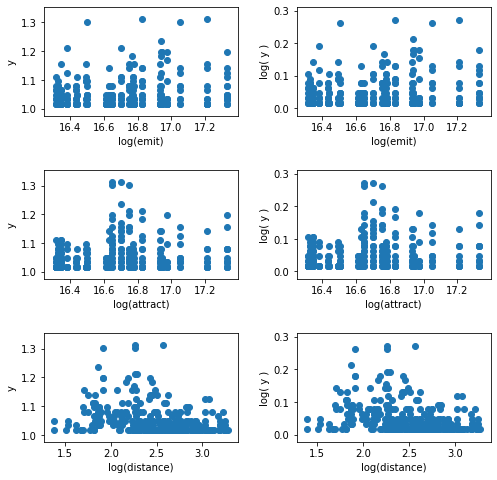

In [27]:
fig = plt.figure(figsize=[8,8])
plt.subplot(3, 2, 1)
plt.scatter(log_grav_df['emit'],(log_grav_df['T']))
plt.xlabel('log(emit)'); plt.ylabel('y')
plt.subplot(3, 2, 2)
plt.scatter(log_grav_df['emit'],np.log(log_grav_df['T']))
plt.xlabel('log(emit)'); plt.ylabel('log( y )')

plt.subplot(3, 2, 3)
plt.scatter(log_grav_df['attract'],(log_grav_df['T']))
plt.xlabel('log(attract)'); plt.ylabel('y')
plt.subplot(3, 2, 4)
plt.scatter(log_grav_df['attract'],np.log(log_grav_df['T']))
plt.xlabel('log(attract)'); plt.ylabel('log( y )')

plt.subplot(3, 2, 5)
plt.scatter(log_grav_df['distance'],(log_grav_df['T']))
plt.xlabel('log(distance)'); plt.ylabel('y')
plt.subplot(3, 2, 6)
plt.scatter(log_grav_df['distance'],np.log(log_grav_df['T']))
plt.xlabel('log(distance)'); plt.ylabel('log( y )')

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [54]:
import statsmodels.api as sm
# offset = 4
log_grav_df_processed = log_grav_df
X = (log_grav_df_processed[['emit','attract','distance']])
X = sm.add_constant(X)
y = (log_grav_df_processed['T'])

# glm = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity))
glm = sm.OLS(y, X)
# glm = sm.GLM(y, X, family=sm.families.InverseGaussian(link=sm.families.links.log))
# glm = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
# glm = sm.GLM(y, X, family=sm.families.Tweedie(var_power=10))
result = glm.fit()
result.summary()
# gamma_model = smf.glm(formula='y ~ emit + attract + distance', data=log_grav_df, family=sm.families.Gaussian(sm.families.links.identity))
# gamma_results = gamma_model.fit()
# print(gamma_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     12.98
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           5.47e-08
Time:                        18:49:11   Log-Likelihood:                 476.20
No. Observations:                 302   AIC:                            -944.4
Df Residuals:                     298   BIC:                            -929.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2905      0.245      1.185      0.237      -0.192       0.773
emit           0.0298      0.010      2.882      0.004       0.009       0.050
attract        0.0220      0.011      2.072      0.039       0.001       0.043
distance      -0.0415      0.007     -5.804      0.000      -0.056      -0.027
==============================================================================
Omnibus:                      150.635   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.561
Skew:                           2.095   Prob(JB):                    2.55e-161
Kurtosis:                       9.420   Cond. No.                     2.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

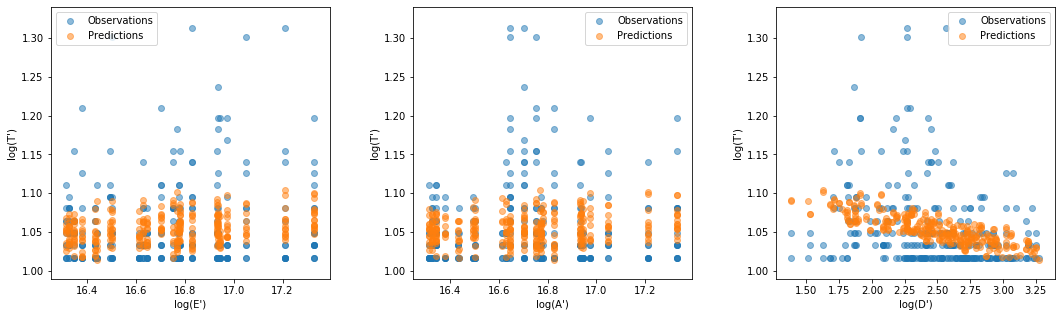

In [59]:
pred = result.predict(sm.add_constant(log_grav_df_processed[['emit','attract','distance']]))
ap=0.5

fig = plt.figure(figsize=[18,5])
plt.subplot(1, 3, 1)
X= log_grav_df_processed['emit']
plt.scatter(X,y, alpha=ap, label = 'Observations')
plt.scatter(X,pred, alpha=ap, label = 'Predictions')
plt.xlabel("log(E')")
plt.ylabel("log(T')")
plt.legend()

plt.subplot(1, 3, 2)
X= log_grav_df_processed['attract']
plt.scatter(X,y, alpha=ap, label = 'Observations')
plt.scatter(X,pred, alpha=ap, label = 'Predictions')
plt.xlabel("log(A')")
plt.ylabel("log(T')")
plt.legend()
plt.subplot(1, 3, 3)
X= log_grav_df_processed['distance']
plt.scatter(X,y, alpha=ap, label = 'Observations')
plt.scatter(X,pred, alpha=ap, label = 'Predictions')
plt.xlabel("log(D')")
plt.ylabel("log(T')")
plt.legend()

fig.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [60]:
outliers = log_grav_df_processed[log_grav_df_processed['T'] > 1.25]
outliers

,emit,attract,distance,T,source,target
73,16.827866,16.701595,2.265497,1.313262,3.0,1.0
194,17.048987,16.750824,1.914169,1.300962,8.0,2.0
264,17.210131,16.645546,2.566628,1.313262,11.0,0.0
288,16.501628,16.645546,2.265405,1.300962,12.0,0.0


In [61]:
print(np.exp(16.6)-np.exp(1))
print(np.exp(16.8)-np.exp(1))
# plt.hist(np.exp(outliers['attract'])-np.exp(1))

16191546.323483482
19776399.94021596


(array([2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        ]),
 <a list of 15 Patch objects>)

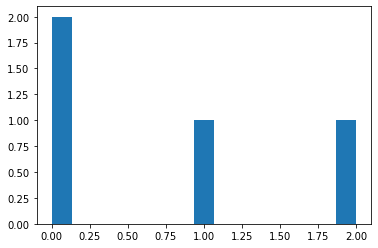

In [62]:
# np.exp(outliers['T'])-np.exp(1)
plt.hist(outliers['target'], bins=15)
# outliers['target']

In [33]:
avg_adj = np.mean(travel_tensors,0)

In [34]:
np.sum([[1,2],[3,4]], 1)

array([3, 7])

In [52]:
sum_adj = np.sum(travel_tensors,0)
out_t = np.sum(sum_adj,1) #out
in_t = np.sum(sum_adj,0)

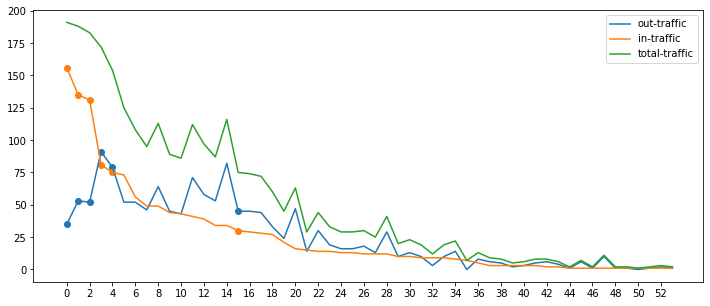

In [53]:
plt.figure(figsize=(12,5))
plt.plot(out_t, label='out-traffic')
plt.plot(in_t, label='in-traffic')
plt.plot(in_t + out_t, label='total-traffic')
plt.scatter([0,1,2,3,4,15],out_t[[0,1,2,3,4,15]])
plt.scatter([0,1,2,3,4,15],in_t[[0,1,2,3,4,15]])
plt.xticks(range(0, 54,2))
plt.legend()
plt.show()

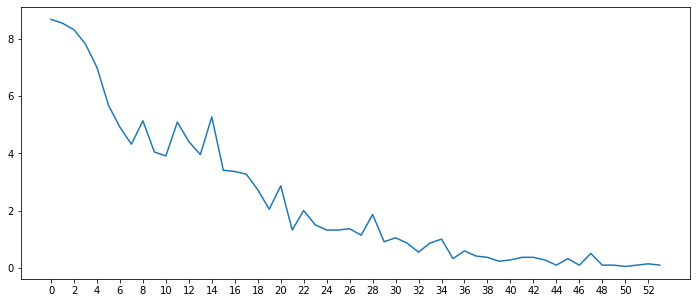

In [37]:
plt.figure(figsize=(12,5))
plt.plot(out_t+in_t)
plt.xticks(range(0, 54,2))
plt.show()

In [38]:
temp_G = nx.from_numpy_matrix(avg_adj, create_using=nx.DiGraph)
G = nx.relabel_nodes(temp_G, label_dict)
cent = nx.load_centrality(G)

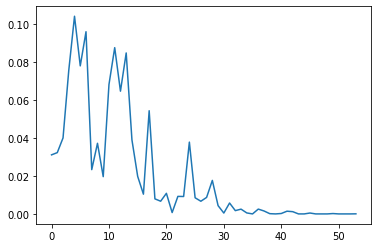

In [39]:
plt.plot(list(cent.values()))